## Title : Rain Prediction in Australia

## Background : 
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. One of the types of weather forecasting is rain forecasting. There are several importance of rain forecasting. The following is a list of various reasons why rain forecasts are important:

1. Helps people prepare for how to dress.
2. Helps people prepare if they need to take extra gear to prepare for the weather.
3. Helps people plan outdoor activities.
4. Helps businesses and people plan for severe weather and other weather hazards.
5. Helps businesses plan for transportation hazards that can result from the weather.


## Problem Statement :

Will it rain tomorrow or later? This is a question which everyone is trying to have an answer to. One of the first things we probably do every morning is look out the window to see what the weather is like. The weather affects us in many ways, it affects us on how we live our life, from agriculture to our outdoor activities. Weather forecasting has been important to everyone for thousands of years, agriculture relies on accurate weather forecasting. Since the late 1930s, observing and forecasting weather requires difficult work which is to send radiosonde balloons up the atmosphere(National Geographic, 2021). Forecasting has always been a tedious job as it requires to observe a few variables such as “humidity”, “wind speed”, “wind direction” and etc. Such a large number of variables has made human-produced-prediction fairly inaccurate and inefficient. To make the forecasting accurate and efficient, we hope to apply the machine learning algorithms on large datasets, to uncover the hidden pattern within, in order to produce very accurate forecasts. Our proposed model explores the prediction of occurrence of rain the next day using various machine learning models.


## Solution : 

In this proposed solution, we explore several machine learning models to predict whether it will rain tomorrow. The following model is being trained and tested using a dataset provided by the Bureau of Meteorology, Australia. This dataset contains 10 years of daily weather observations from many locations across Australia. We aimed to produce a predictive model which provides fairly accurate predictions with the least amount of training time and human efforts, to maximize the outputs and resources. 


## Project Plan

Firstly, the dataset has been obtained from Kaggle, which the datasets was compiled from Bureau of Meteorology Australia. Data understanding and Exploratory Data Analysis will be carried out on the data.  Categorical and numerical data is then being identified and explored. Features of the dataset are then being engineered to suit the needs of the solution. 

Secondly, the explored and engineered data is then being used for data preprocessing. Datasets were splitted into training and testing sets. Duplication and missing values were being checked. Missing categorical values are being imputed using mode. Missing numerical data is being imputed using median. Outliers are then identified and cleaned, Binary encoding on categorical data is then being performed. Features are then being scaled to map the variables onto the same scale. 

Thirdly, 12 baseline models are trained, which includes Logistic Regression, Decision Tree Classifier, K-Neighbors Classifier, MLP Classifier, Gaussian-Naive Bayes, Bernoulli-Naive Bayes, Multinomial Naive Bayes, Support Vector Classifier, SGD Classifier, Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. Models are being evaluated to extract the metrics of Accuracy, Balanced Accuracy, Precision, Recall, F1 Score, ROC-AUC, PR-AUC, Cohen Kappa Score, Fit Time and Score Time. 

Fourthly, Feature Selection such as RFECV and PCA is being performed and evaluation was made on the models after feature selection. The best performing models are being shortlisted by looking at the criteria of ‘Balanced Accuracy’, ‘Time Taken For Training’, ‘PR-AUC’ and ‘Cohen's Kappa Score’

Furthermore, 3 models which are Logistic Regression, Support Vector Classifier and Gradient Boosting Classifier were chosen for hyperparameter tuning. 3 Ensemble Models are being created using the combinations of three classifiers, it was tested and results were compared. 

Lastly, the 6 models are being tested and evaluated by comparing the learning curve and other metrics before one of the models being concluded.


## Task Allocation

| Name    | Tasks |
| ----------- | ----------- |
| Tan Jie Ying     | Data Understanding (EDA on Categorical and Numerical Data) + Missing Value Processing + Training Baseline Model      |
| Andy Chow Sai Kit   | Data Understanding (Boxplot Visualization) + Outlier Processing + Feature Selection         |
| Wong Yew Lee    | Data Understanding (Class Distribution) + Data Encoding + Shortlisting Models + Evaluation       |
| Li Chen Zhen   | Data Understanding(Multivariate Analysis) + Feature Scaling + Ensemble Modeling        |

## Import Libraries and Dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('a.csv')

%load_ext autotime

time: 528 µs (started: 2021-04-18 15:33:58 +08:00)


## Data Understanding

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

The dataset has 23 columns with 12982 rows.



1. Date           
The date of observation

2. Location       
The common name of the location of the weather station

3. MinTemp        
The minimum temperature in degrees celsius

4. MaxTemp        
The maximum temperature in degrees celsius

5. Rainfall       
The amount of rainfall recorded for the day in mm

6. Evaporation    
The so-called Class A pan evaporation (mm) in the 24 hours to 9am

7. Sunshine       
The number of hours of bright sunshine in the day.

8. WindGustDir     
The direction of the strongest wind gust in the 24 hours to midnight
 
9. WindGustSpeed  
The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. WindDir9am     
Direction of the wind at 9am

11. WindDir3pm     
Direction of the wind at 3pm

12. WindSpeed9am   
Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. WindSpeed3pm   
Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. Humidity9am    
Humidity (percent) at 9am

15. Humidity3pm    
Humidity (percent) at 3pm

16. Pressure9am    
Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. Pressure3pm    
Atmospheric pressure (hpa) reduced to mean sea level at 3pm
 
18. Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
 
19. Cloud3pm       
Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. Temp9am        
Temperature (degrees C) at 9am

21. Temp3pm        
Temperature (degrees C) at 3pm

22. RainToday      
Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

23. RainTomorrow   
The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". 



## Exploratory Data Analysis

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/1/2009,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
1,1/2/2009,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
2,1/3/2009,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
3,1/4/2009,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
4,1/5/2009,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No


time: 516 ms (started: 2021-04-18 15:33:58 +08:00)


In [4]:
data.shape

(12982, 23)

time: 11.8 ms (started: 2021-04-18 15:33:58 +08:00)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12982 entries, 0 to 12981
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12982 non-null  object 
 1   Location       12982 non-null  object 
 2   MinTemp        12492 non-null  float64
 3   MaxTemp        12496 non-null  float64
 4   Rainfall       12166 non-null  float64
 5   Evaporation    11186 non-null  float64
 6   Sunshine       10616 non-null  float64
 7   WindGustDir    11563 non-null  object 
 8   WindGustSpeed  11565 non-null  float64
 9   WindDir9am     12216 non-null  object 
 10  WindDir3pm     12694 non-null  object 
 11  WindSpeed9am   12725 non-null  float64
 12  WindSpeed3pm   12733 non-null  float64
 13  Humidity9am    12419 non-null  float64
 14  Humidity3pm    12470 non-null  float64
 15  Pressure9am    12255 non-null  float64
 16  Pressure3pm    12259 non-null  float64
 17  Cloud9am       10085 non-null  float64
 18  Cloud3

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

time: 27.9 ms (started: 2021-04-18 15:33:59 +08:00)


In [7]:
data.nunique()

Date             3436
Location            4
MinTemp           341
MaxTemp           370
Rainfall          260
Evaporation       147
Sunshine          142
WindGustDir        16
WindGustSpeed      55
WindDir9am         16
WindDir3pm         16
WindSpeed9am       37
WindSpeed3pm       36
Humidity9am        87
Humidity3pm       100
Pressure9am       441
Pressure3pm       440
Cloud9am           10
Cloud3pm            9
Temp9am           348
Temp3pm           372
RainToday           2
RainTomorrow        2
dtype: int64

time: 134 ms (started: 2021-04-18 15:33:59 +08:00)


In [8]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,12492.000000,12496.000000,12166.000000,11186.000000,10616.000000,11565.000000,12725.000000,12733.000000,12419.000000,12470.000000,12255.000000,12259.000000,10085.000000,9877.000000,12478.000000,12487.000000
mean,10.722799,21.968214,2.193786,4.903549,7.219621,41.045828,14.390570,19.236472,69.343023,48.575060,1018.395945,1015.983522,4.494993,4.572542,15.013119,20.527541
std,6.302727,6.554904,7.096515,3.389818,3.894060,14.583387,9.338961,8.936211,16.049204,18.545674,7.358022,7.172440,2.855661,2.635960,5.963419,6.374995
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,9.000000,1.000000,986.700000,984.200000,0.000000,0.000000,-1.300000,3.700000
25%,6.700000,16.900000,0.000000,2.400000,4.100000,31.000000,7.000000,13.000000,59.000000,35.000000,1013.500000,1011.100000,1.000000,2.000000,10.700000,15.700000
50%,10.900000,21.400000,0.000000,4.100000,8.000000,39.000000,13.000000,19.000000,70.000000,48.000000,1018.500000,1016.100000,5.000000,5.000000,14.900000,20.000000
75%,15.300000,26.300000,0.600000,6.800000,10.300000,50.000000,20.000000,24.000000,81.000000,60.000000,1023.400000,1020.900000,7.000000,7.000000,19.300000,24.800000
max,28.600000,46.400000,119.400000,39.400000,14.100000,122.000000,67.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,36.500000,45.400000


time: 229 ms (started: 2021-04-18 15:33:59 +08:00)


### Exploring Categorical Variables

In [9]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
time: 2.06 ms (started: 2021-04-18 15:33:59 +08:00)


In [10]:
data[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1/1/2009,WaggaWagga,WNW,NW,W,No,No
1,1/2/2009,WaggaWagga,WSW,SW,SW,No,No
2,1/3/2009,WaggaWagga,NE,ENE,NNE,No,No
3,1/4/2009,WaggaWagga,N,NE,NW,No,No
4,1/5/2009,WaggaWagga,W,NNE,SW,No,No


time: 101 ms (started: 2021-04-18 15:33:59 +08:00)


**Cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [11]:
categorical = [var for var in data.columns if data[var].dtype=='O']

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  4  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels
time: 121 ms (started: 2021-04-18 15:33:59 +08:00)


**Summary of categorical variables**
- There is a date variable - 'Date'.
- There are two binary categorical variables - 'RainToday' and 'RainTomorrow'.
- The target variable is 'RainTomorrow'.
- All categorical variables need to be transformed.

**Feature Engineering of Date**

In [12]:
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,1003.5,1.0,1.0,20.8,27.0,No,No,1,1,2009
1,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,1012.9,1.0,0.0,14.7,23.2,No,No,2,1,2009
2,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,1014.3,0.0,1.0,18.9,28.0,No,No,3,1,2009
3,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,1010.6,1.0,4.0,24.7,33.7,No,No,4,1,2009
4,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,1009.8,1.0,1.0,23.6,34.6,No,No,5,1,2009


time: 5.45 s (started: 2021-04-18 15:33:59 +08:00)


In [13]:
data  = data.drop(["Date"],axis=1)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,W,...,1003.5,1.0,1.0,20.8,27.0,No,No,1,1,2009
1,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,SW,...,1012.9,1.0,0.0,14.7,23.2,No,No,2,1,2009
2,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,NNE,...,1014.3,0.0,1.0,18.9,28.0,No,No,3,1,2009
3,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,NW,...,1010.6,1.0,4.0,24.7,33.7,No,No,4,1,2009
4,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,SW,...,1009.8,1.0,1.0,23.6,34.6,No,No,5,1,2009


time: 525 ms (started: 2021-04-18 15:34:05 +08:00)


In [14]:
#update categorical variable list
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

time: 55.8 ms (started: 2021-04-18 15:34:05 +08:00)


### Exploring Numerical Variables

In [15]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']
time: 19.9 ms (started: 2021-04-18 15:34:05 +08:00)


In [16]:
data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,9.9,28.4,0.0,9.8,13.5,59.0,7.0,35.0,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,1,1,2009
1,8.9,25.3,0.0,14.8,13.7,48.0,22.0,28.0,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,2,1,2009
2,11.0,30.7,0.0,9.8,13.7,39.0,26.0,9.0,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,3,1,2009
3,14.7,35.2,0.0,9.4,12.1,39.0,17.0,13.0,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,4,1,2009
4,11.8,36.5,0.0,11.6,13.4,43.0,7.0,19.0,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,5,1,2009


time: 111 ms (started: 2021-04-18 15:34:06 +08:00)


**Summary of numerical variables**
- All of the numerical variables are of continuous type.

In [17]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  12492.0  12496.0   12166.0      11186.0   10616.0        11565.0   
mean      11.0     22.0       2.0          5.0       7.0           41.0   
std        6.0      7.0       7.0          3.0       4.0           15.0   
min       -8.0      4.0       0.0          0.0       0.0           11.0   
25%        7.0     17.0       0.0          2.0       4.0           31.0   
50%       11.0     21.0       0.0          4.0       8.0           39.0   
75%       15.0     26.0       1.0          7.0      10.0           50.0   
max       29.0     46.0     119.0         39.0      14.0          122.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       12725.0       12733.0      12419.0      12470.0      12255.0   
mean           14.0          19.0         69.0         49.0       1018.0   
std             9.0           9.0         16.0         19.0          7.0   
min             0.0 

**Boxplot for Outliers**

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -10.8 or > 20.0
WindSpeed9am outliers are values < -32.0 or > 59.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


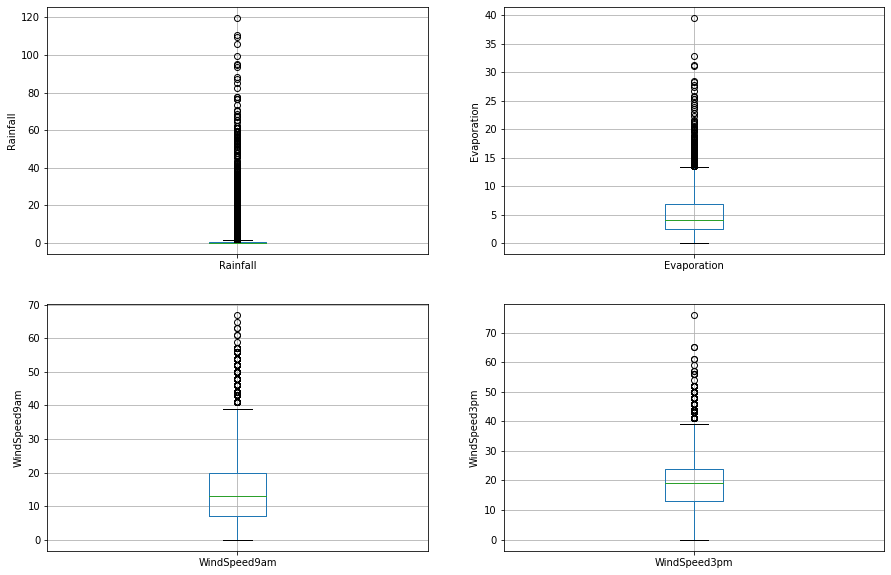

time: 6.03 s (started: 2021-04-18 15:34:06 +08:00)


In [18]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

# find outliers for Rainfall variable

IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Sunshine outliers are values < -14.500000000000002 or > 28.900000000000002
MinTemp outliers are values < -19.100000000000005 or > 41.10000000000001
MaxTemp outliers are values < -11.300000000000008 or > 54.50000000000001


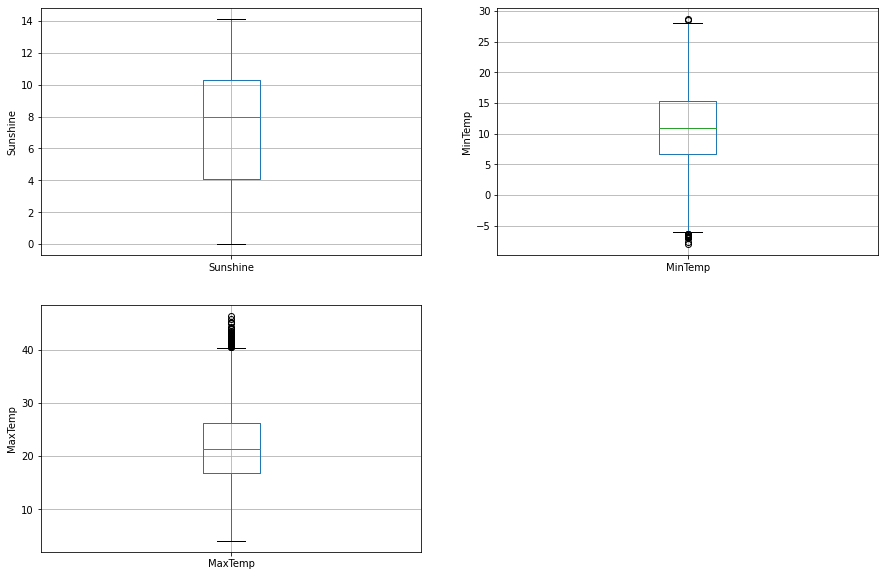

time: 4.84 s (started: 2021-04-18 15:34:12 +08:00)


In [19]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

# find outliers for Sunshine variable

IQR = data.Sunshine.quantile(0.75) - data.Sunshine.quantile(0.25)
Lower_fence = data.Sunshine.quantile(0.25) - (IQR * 3)
Upper_fence = data.Sunshine.quantile(0.75) + (IQR * 3)
print('Sunshine outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for MinTemp variable

IQR = data.MinTemp.quantile(0.75) - data.MinTemp.quantile(0.25)
Lower_fence = data.MinTemp.quantile(0.25) - (IQR * 3)
Upper_fence = data.MinTemp.quantile(0.75) + (IQR * 3)
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for MaxTemp variable

IQR = data.MaxTemp.quantile(0.75) - data.MaxTemp.quantile(0.25)
Lower_fence = data.MaxTemp.quantile(0.25) - (IQR * 3)
Upper_fence = data.MaxTemp.quantile(0.75) + (IQR * 3)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Text(0, 0.5, 'RainTomorrow')

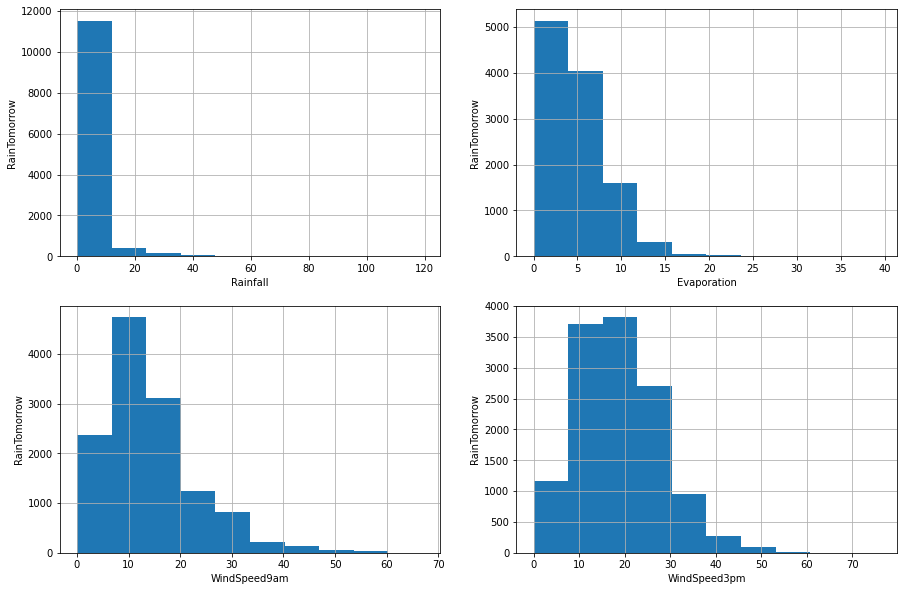

time: 4.78 s (started: 2021-04-18 15:34:17 +08:00)


In [20]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



Text(0, 0.5, 'RainTomorrow')

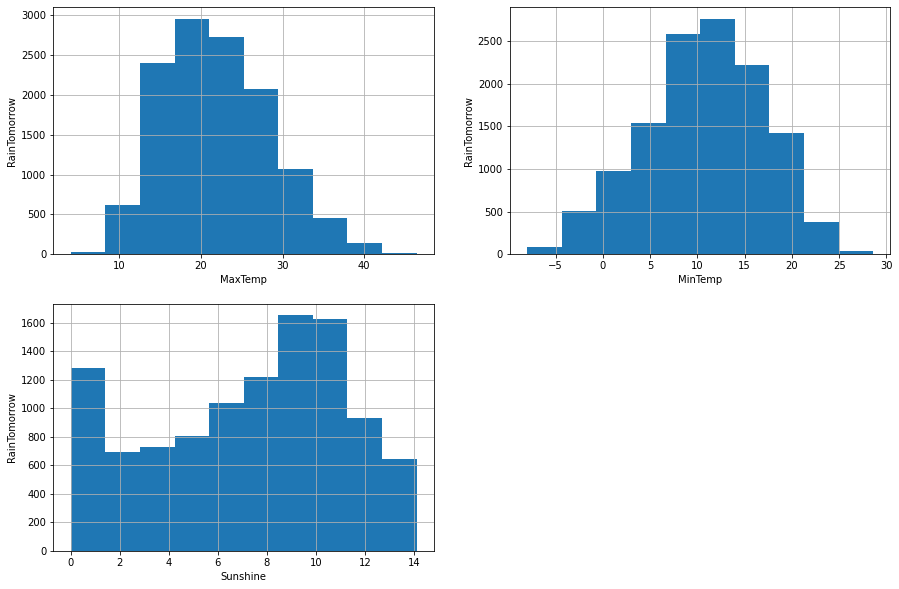

time: 5.8 s (started: 2021-04-18 15:34:22 +08:00)


In [21]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.MaxTemp.hist(bins=10)
fig.set_xlabel('MaxTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = data.MinTemp.hist(bins=10)
fig.set_xlabel('MinTemp')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = data.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')
fig.set_ylabel('RainTomorrow')

### Exploring Class Distribution

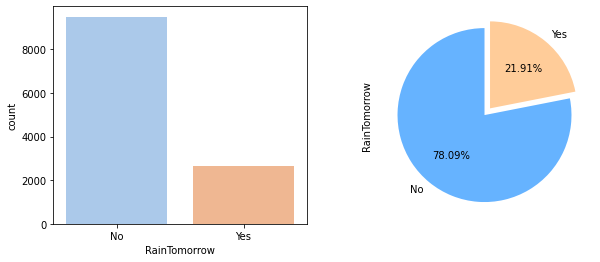

time: 2.75 s (started: 2021-04-18 15:34:28 +08:00)


In [22]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels=['No', 'Yes']
sns.countplot(x=data.RainTomorrow, data=data, palette="pastel",ax=ax[0])
data['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

Most of the classes of ‘RainTomorrow’ is ‘No’. Therefore, this dataset is imbalanced.

### Exploring Locations

In [23]:
# print number of labels in Location variable
print('Location contains', len(data.Location.unique()), 'labels')

# check labels in location variable
data.Location.unique()

# check frequency distribution of values in Location variable
data.Location.value_counts()

Location contains 4 labels


Canberra      3436
Sydney        3344
Melbourne     3193
WaggaWagga    3009
Name: Location, dtype: int64

time: 159 ms (started: 2021-04-18 15:34:30 +08:00)


[Text(0.5, 1.0, 'Year, Location Vs Rainfall'), Text(0, 0.5, 'Rainfall (mm)')]

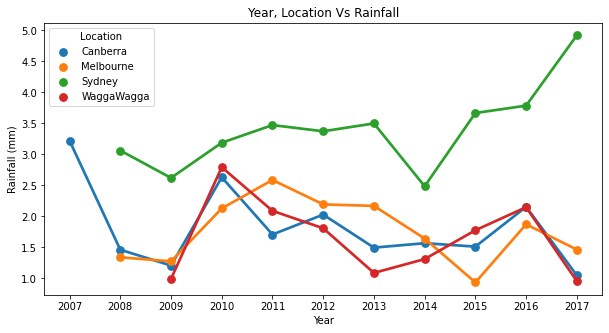

time: 5.61 s (started: 2021-04-18 15:34:31 +08:00)


In [24]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Rainfall'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Rainfall'],hue=houragg['Location']).set(title='Year, Location Vs Rainfall', ylabel = 'Rainfall (mm)')


[Text(0.5, 1.0, 'Year, Location Vs Minimum Temperature'),
 Text(0, 0.5, 'Minimum Temperature(°C)')]

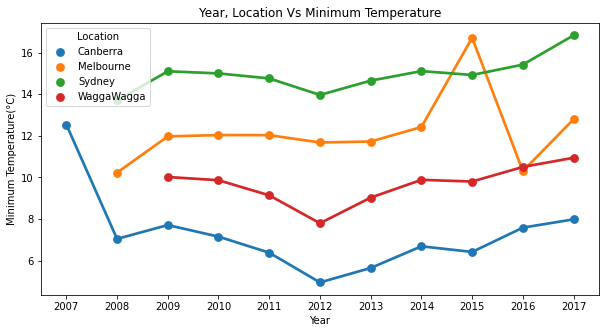

time: 1.86 s (started: 2021-04-18 15:34:36 +08:00)


In [25]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['MinTemp'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['MinTemp'],hue=houragg['Location']).set(title='Year, Location Vs Minimum Temperature', ylabel = 'Minimum Temperature(°C)')


[Text(0.5, 1.0, 'Year, Location Vs Maximum Temperature'),
 Text(0, 0.5, 'Maximum Temperature(°C)')]

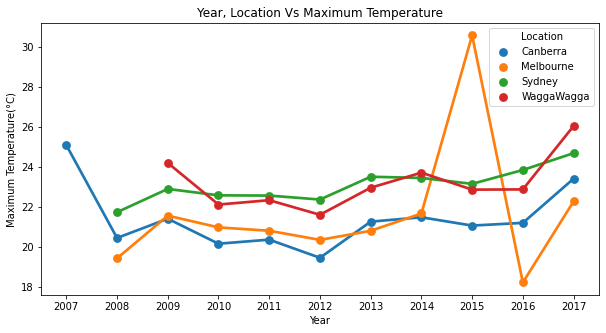

time: 6.31 s (started: 2021-04-18 15:34:38 +08:00)


In [26]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['MaxTemp'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['MaxTemp'],hue=houragg['Location']).set(title='Year, Location Vs Maximum Temperature', ylabel = 'Maximum Temperature(°C)')


[Text(0.5, 1.0, 'Year, Location Vs Evaporation'),
 Text(0, 0.5, 'Evaporation (mm)')]

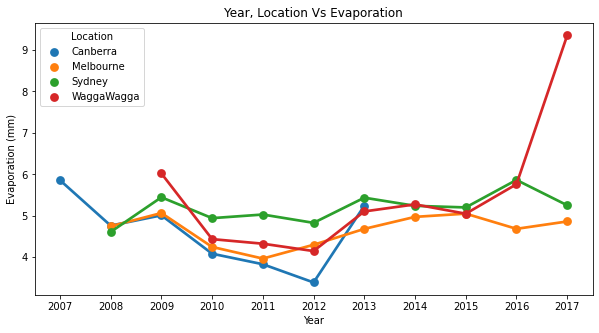

time: 2.39 s (started: 2021-04-18 15:34:45 +08:00)


In [27]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Evaporation'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Evaporation'],hue=houragg['Location']).set(title='Year, Location Vs Evaporation', ylabel = 'Evaporation (mm)')


[Text(0.5, 1.0, 'Year, Location Vs Sunshine')]

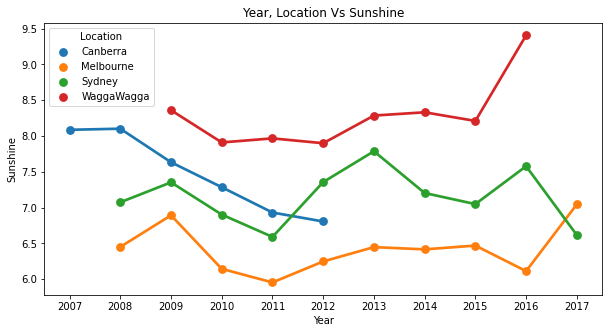

time: 1.67 s (started: 2021-04-18 15:34:47 +08:00)


In [28]:
plt.figure(figsize=(10,5))
houragg = pd.DataFrame(data.groupby(['Year','Location'])['Sunshine'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['Year'],y=houragg['Sunshine'],hue=houragg['Location']).set(title='Year, Location Vs Sunshine')


### Multivariate Analysis

Multivariate means involving multiple dependent variables resulting in one outcome. For example, we cannot predict whether it will rain based on the temperature alone. There are multiple factors like wind direction,wind speed, humidity etc. 

**Heatmap**

A heatmap is a graphical representation of data where values are depicted by color. Heat maps make it easy to visualize complex data and understand it at a glance. In this case, the heat map is used to visualize the correlation between any two variables. 

<AxesSubplot:>

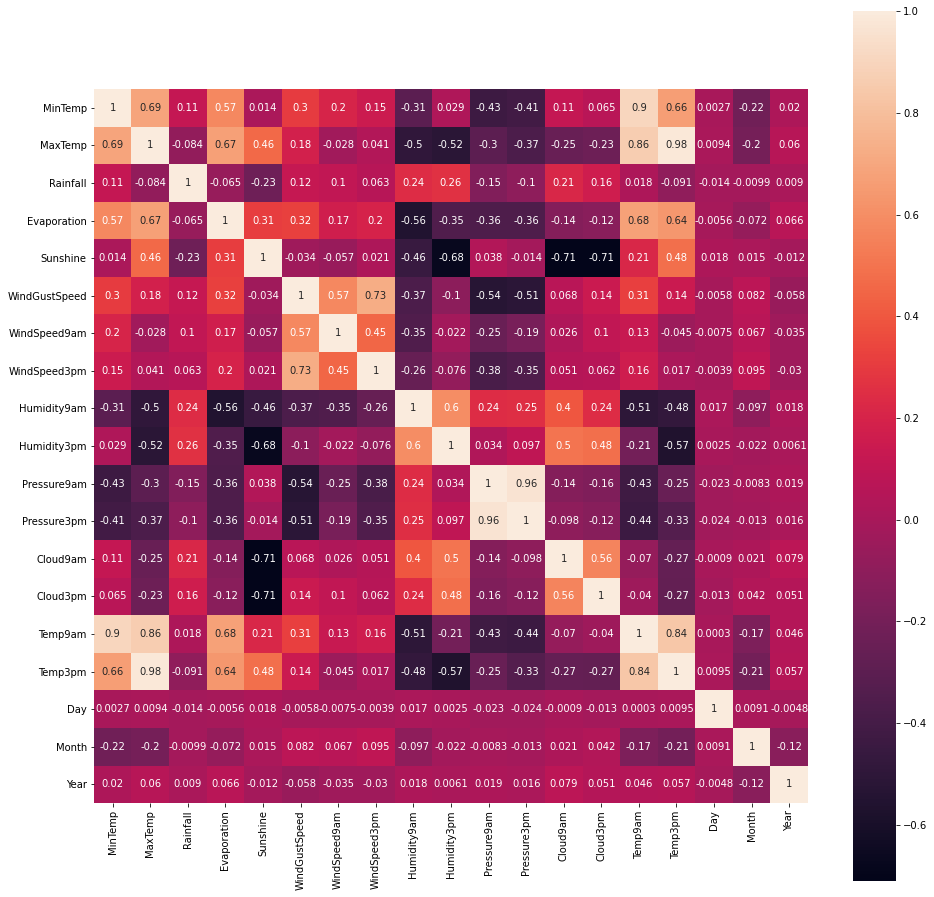

time: 15.5 s (started: 2021-04-18 15:34:49 +08:00)


In [29]:
corrmat = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,annot=True, square=True)

**From the above correlation heat map, we can conclude that:**

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

In [30]:
# Calculate the correlation values
feature_cols = [var for var in data.columns if var != 'RainTomorrow']

corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
31,MaxTemp,Temp3pm,0.983102,0.983102
135,Pressure9am,Pressure3pm,0.962644,0.962644
13,MinTemp,Temp9am,0.902728,0.902728
30,MaxTemp,Temp9am,0.863468,0.863468
161,Temp9am,Temp3pm,0.836368,0.836368


time: 211 ms (started: 2021-04-18 15:35:04 +08:00)


In [31]:
# Drop columns with correlation higher than 0.95
data = data.drop(['Temp3pm', 'Pressure3pm'], axis=1)

time: 4.08 ms (started: 2021-04-18 15:35:05 +08:00)


In [32]:
#update numerical variable list
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Day',
 'Month',
 'Year']

time: 139 ms (started: 2021-04-18 15:35:05 +08:00)


**Pairplot**

In [33]:
#num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
#vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation','WindGustSpeed', 'WindSpeed3pm'), 
# sns.pairplot(data=data, kind='scatter', diag_kind='hist', hue='RainTomorrow')
# plt.show()

time: 91.8 ms (started: 2021-04-18 15:35:05 +08:00)


### Checking for Duplicates

In [34]:
data.duplicated().sum()

0

time: 166 ms (started: 2021-04-18 15:35:05 +08:00)


## Preparing features and target

In [35]:
X = data.drop(['RainTomorrow'], axis=1)

y = data['RainTomorrow']

time: 30.3 ms (started: 2021-04-18 15:35:05 +08:00)


## Splitting data into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

time: 2.27 s (started: 2021-04-18 15:35:05 +08:00)


In [37]:
X_train.shape, X_test.shape

((10385, 22), (2597, 22))

time: 2.79 ms (started: 2021-04-18 15:35:07 +08:00)


## Handling Missing Values

### Impute Missing Values in Categorical Variables

In [38]:
categorical_features = [var for var in categorical if var != 'RainTomorrow']
target = 'RainTomorrow'

time: 87.4 ms (started: 2021-04-18 15:35:07 +08:00)


In [39]:
X_train[categorical_features].isnull().sum()

Location          0
WindGustDir    1123
WindDir9am      614
WindDir3pm      221
RainToday       626
dtype: int64

time: 104 ms (started: 2021-04-18 15:35:07 +08:00)


In [40]:
y_train.isnull().sum()

639

time: 91.7 ms (started: 2021-04-18 15:35:08 +08:00)


In [41]:
X_test[categorical_features].isnull().sum()

Location         0
WindGustDir    296
WindDir9am     152
WindDir3pm      67
RainToday      190
dtype: int64

time: 89.7 ms (started: 2021-04-18 15:35:08 +08:00)


In [42]:
y_test.isnull().sum()

177

time: 91.5 ms (started: 2021-04-18 15:35:08 +08:00)


In [43]:
cat_missing = data[categorical_features].columns[data[categorical_features].isnull().any()].tolist()
cat_missing

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

time: 103 ms (started: 2021-04-18 15:35:08 +08:00)


Replace the missing values of 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' and 'RainTomorrow' with mode.

Modes of categorical features:

In [44]:
for m in cat_missing:
  print(m, '\t', X_train[m].mode()[0])

WindGustDir 	 N
WindDir9am 	 W
WindDir3pm 	 WNW
RainToday 	 No
time: 86.7 ms (started: 2021-04-18 15:35:08 +08:00)


Mode of target:

In [45]:
y_train.mode()[0]

'No'

time: 79 ms (started: 2021-04-18 15:35:08 +08:00)


In [46]:
for m in cat_missing:
  X_train[m].fillna(X_train[m].mode()[0], inplace=True)
  X_test[m].fillna(X_train[m].mode()[0], inplace=True)

time: 104 ms (started: 2021-04-18 15:35:08 +08:00)


In [47]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

time: 58.9 ms (started: 2021-04-18 15:35:08 +08:00)


Check whether all missing values for categorical variables have been removed.

In [48]:
X_train[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

time: 87.7 ms (started: 2021-04-18 15:35:08 +08:00)


In [49]:
y_train.isnull().sum()

0

time: 48.3 ms (started: 2021-04-18 15:35:09 +08:00)


In [50]:
X_test[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

time: 70.8 ms (started: 2021-04-18 15:35:09 +08:00)


In [51]:
y_test.isnull().sum()

0

time: 61.5 ms (started: 2021-04-18 15:35:09 +08:00)


### Impute Missing Values in Numerical Variables

In [52]:
X_train[numerical].isnull().sum()

MinTemp           381
MaxTemp           378
Rainfall          626
Evaporation      1449
Sunshine         1901
WindGustSpeed    1122
WindSpeed9am      207
WindSpeed3pm      197
Humidity9am       438
Humidity3pm       397
Pressure9am       568
Cloud9am         2282
Cloud3pm         2443
Temp9am           392
Day                 0
Month               0
Year                0
dtype: int64

time: 86.3 ms (started: 2021-04-18 15:35:09 +08:00)


In [53]:
X_test[numerical].isnull().sum()

MinTemp          109
MaxTemp          108
Rainfall         190
Evaporation      347
Sunshine         465
WindGustSpeed    295
WindSpeed9am      50
WindSpeed3pm      52
Humidity9am      125
Humidity3pm      115
Pressure9am      159
Cloud9am         615
Cloud3pm         662
Temp9am          112
Day                0
Month              0
Year               0
dtype: int64

time: 75.7 ms (started: 2021-04-18 15:35:09 +08:00)


In [54]:
num_missing = data[numerical].columns[data[numerical].isnull().any()].tolist()
num_missing

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

time: 85.3 ms (started: 2021-04-18 15:35:09 +08:00)


Replace the missing values for the above numerical variables with median.

Medians of numerical variables:

In [55]:
for m in num_missing:
  print(m, '\t', X_train[m].median())

MinTemp 	 10.9
MaxTemp 	 21.4
Rainfall 	 0.0
Evaporation 	 4.0
Sunshine 	 7.9
WindGustSpeed 	 39.0
WindSpeed9am 	 13.0
WindSpeed3pm 	 19.0
Humidity9am 	 70.0
Humidity3pm 	 48.0
Pressure9am 	 1018.5
Cloud9am 	 5.0
Cloud3pm 	 5.0
Temp9am 	 14.9
time: 121 ms (started: 2021-04-18 15:35:09 +08:00)


In [56]:
for m in num_missing:
  X_train[m].fillna(X_train[m].median(), inplace=True)
  X_test[m].fillna(X_train[m].median(), inplace=True)

time: 304 ms (started: 2021-04-18 15:35:09 +08:00)


Check whether all missing values for numerical variables have been removed.

In [57]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

time: 98.5 ms (started: 2021-04-18 15:35:10 +08:00)


In [58]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

time: 97.5 ms (started: 2021-04-18 15:35:10 +08:00)


## Engineering Outliers

**Outlier cleaning for training data**

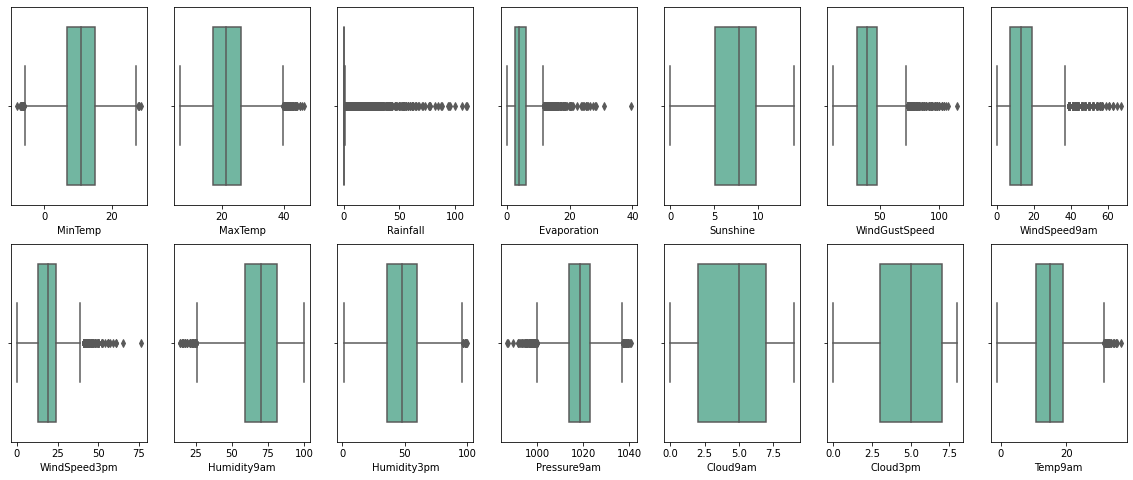

time: 10.2 s (started: 2021-04-18 15:35:10 +08:00)


In [59]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=7, figsize=(20,8))
    for i in range(2):
        for j in range(7):
            sns.boxplot(x = df[columns[count]], palette="Set2",ax=ax[i][j])
            count = count+1
boxplot_for_outlier(X_train, numerical)

In [60]:
lower_and_upper={}
X_train_outlier = X_train.copy()

for col in numerical:
    if(col=="Rainfall"): 
        sparse_value = X_train[col].mode()[0]
        nonsparse_data = pd.DataFrame(X_train[X_train[col] != sparse_value][col])
        q1=nonsparse_data[col].describe()[4]
        q3=nonsparse_data[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5*iqr)
        upperbound = q3 + (1.5*iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lowerbound),col] =  lowerbound*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>upperbound),col] =  upperbound*1.25
        X_train_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        q1=X_train_outlier[col].describe()[4]
        q3=X_train_outlier[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5 * iqr)
        upperbound = q3 + (1.5 * iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        number_of_outlier = X_train_outlier.loc[(X_train_outlier.loc[:,col]<lowerbound)\
                                                           | (X_train_outlier.loc[:,col]>upperbound)].shape[0]
        if(number_of_outlier>0):
            print(number_of_outlier," outlier values cleared in" ,col)
            X_train_outlier.loc[(X_train_outlier.loc[:,col]<lowerbound),col] =  lowerbound*0.75
            X_train_outlier.loc[(X_train_outlier.loc[:,col]>upperbound),col] =  upperbound*1.25

19  outlier values cleared in MinTemp
72  outlier values cleared in MaxTemp
339  outlier values cleared in Evaporation
291  outlier values cleared in WindGustSpeed
228  outlier values cleared in WindSpeed9am
209  outlier values cleared in WindSpeed3pm
65  outlier values cleared in Humidity9am
14  outlier values cleared in Humidity3pm
110  outlier values cleared in Pressure9am
33  outlier values cleared in Temp9am
time: 1.57 s (started: 2021-04-18 15:35:20 +08:00)


**Outlier cleaning for testing data**




In [61]:
X_test_outlier = X_test.copy()

for col in numerical:
    if(col =="Rainfall"):
        sparse_value = X_test[col].mode()[0]
        nonsparse_data = pd.DataFrame(X_test[X_test[col] != sparse_value][col])
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25
        X_test_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        
        number_of_outlier_test = X_test_outlier.loc[(X_test_outlier.loc[:,col]<lower_and_upper[col][0]) |\
                                                    (X_test_outlier.loc[:,col]>lower_and_upper[col][1])].shape[0]
        if(number_of_outlier_test>0):
            print(number_of_outlier_test," outlier values cleared in" ,col)
            X_test_outlier.loc[(X_test_outlier.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
            X_test_outlier.loc[(X_test_outlier.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25

8  outlier values cleared in MinTemp
16  outlier values cleared in MaxTemp
86  outlier values cleared in Evaporation
61  outlier values cleared in WindGustSpeed
59  outlier values cleared in WindSpeed9am
47  outlier values cleared in WindSpeed3pm
25  outlier values cleared in Humidity9am
5  outlier values cleared in Humidity3pm
27  outlier values cleared in Pressure9am
3  outlier values cleared in Temp9am
time: 438 ms (started: 2021-04-18 15:35:22 +08:00)


**Visualization after cleaning outliers**

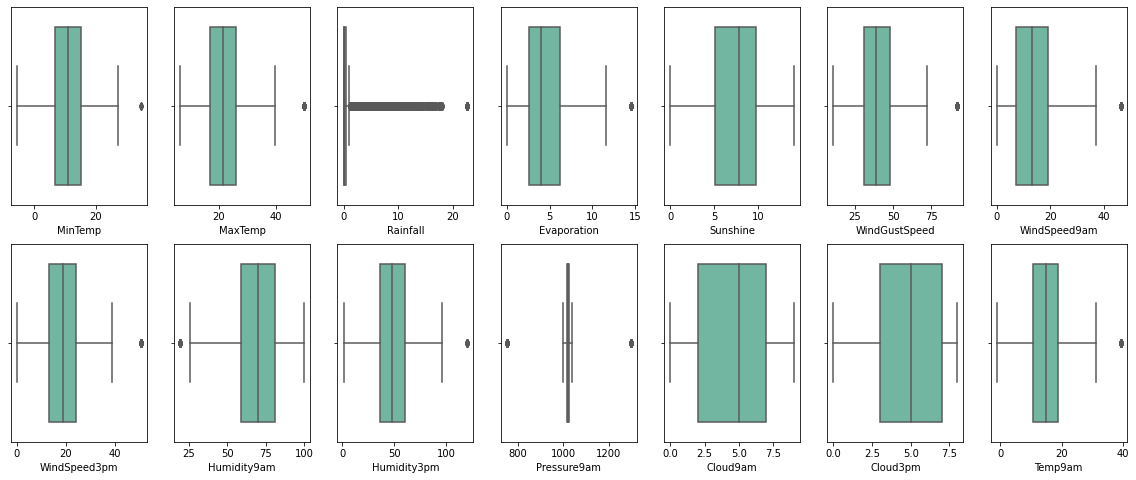

time: 12.6 s (started: 2021-04-18 15:35:22 +08:00)


In [62]:
boxplot_for_outlier(X_train_outlier, numerical)

In [63]:
X_test[numerical] = X_test_outlier[numerical]
X_train[numerical] = X_train_outlier[numerical]
pd.options.mode.chained_assignment = None

time: 42.5 ms (started: 2021-04-18 15:35:35 +08:00)


## Data Encoding

Machine learning models require all input and output variables to be numeric.
This means that if the data contains categorical data, then we must encode it to numbers before we can fit and evaluate a model.


###Encoding on Binary Data (RainToday)

In [64]:
#Binary Encoder for RainToday, and RainTomorrow
#Onehotencoding for categorical data

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
onehotencoder = preprocessing.OneHotEncoder()

X_train['RainToday'] = lb.fit_transform(X_train['RainToday'])
X_test['RainToday'] = lb.transform(X_test['RainToday'])

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

time: 225 ms (started: 2021-04-18 15:35:35 +08:00)


###Encoding on Categorical Data

In [65]:
# Encoding on train data
X_train['Location'] = pd.Categorical(X_train['Location'])
datasetDummies_Location = pd.get_dummies(X_train['Location'], prefix = 'Location_encoded')
X_train.drop("Location", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_Location], axis=1)

X_train['WindGustDir'] = pd.Categorical(X_train['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(X_train['WindGustDir'], prefix = 'WindGustDir_encoded')
X_train.drop("WindGustDir", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindGustDir], axis=1)

X_train['WindDir9am'] = pd.Categorical(X_train['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(X_train['WindDir9am'], prefix = 'WindDir9am_encoded')
X_train.drop("WindDir9am", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindDir9am], axis=1)

X_train['WindDir3pm'] = pd.Categorical(X_train['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(X_train['WindDir3pm'], prefix = 'WindDir3pm_encoded')
X_train.drop("WindDir3pm", axis=1, inplace=True)
X_train = pd.concat([X_train, datasetDummies_WindDir3pm], axis=1)

# Encoding on test data
X_test['Location'] = pd.Categorical(X_test['Location'])
datasetDummies_Location = pd.get_dummies(X_test['Location'], prefix = 'Location_encoded')
X_test.drop("Location", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_Location], axis=1)

X_test['WindGustDir'] = pd.Categorical(X_test['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(X_test['WindGustDir'], prefix = 'WindGustDir_encoded')
X_test.drop("WindGustDir", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindGustDir], axis=1)

X_test['WindDir9am'] = pd.Categorical(X_test['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(X_test['WindDir9am'], prefix = 'WindDir9am_encoded')
X_test.drop("WindDir9am", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindDir9am], axis=1)

X_test['WindDir3pm'] = pd.Categorical(X_test['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(X_test['WindDir3pm'], prefix = 'WindDir3pm_encoded')
X_test.drop("WindDir3pm", axis=1, inplace=True)
X_test = pd.concat([X_test, datasetDummies_WindDir3pm], axis=1)

time: 153 ms (started: 2021-04-18 15:35:35 +08:00)


In [66]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
6353,10.0,28.4,0.6,4.0,7.9,26.0,9.0,9.0,86.0,36.0,...,0,0,0,0,0,0,1,0,0,0
12621,10.3,11.7,0.0,3.2,0.8,63.0,24.0,24.0,67.0,72.0,...,0,0,0,0,0,0,0,0,0,0
12189,10.9,21.4,0.0,2.6,0.0,37.0,0.0,13.0,70.0,48.0,...,0,0,0,0,0,0,0,0,0,1
4779,5.8,27.3,0.0,9.0,10.1,54.0,17.0,33.0,36.0,21.0,...,0,0,0,0,0,0,0,0,1,0
9098,5.0,14.2,0.0,0.6,4.8,48.0,20.0,19.0,46.0,46.0,...,0,0,0,0,0,0,0,0,1,0


time: 72.4 ms (started: 2021-04-18 15:35:35 +08:00)


In [67]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
10828,7.7,16.3,0.0,3.0,8.4,61.0,20.0,22.0,59.0,33.0,...,0,1,0,0,0,0,0,0,0,0
9876,14.7,28.2,0.0,10.0,9.1,63.0,35.0,28.0,41.0,13.0,...,0,1,0,0,0,0,0,0,0,0
2263,1.6,16.5,0.0,0.8,9.0,30.0,15.0,11.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
11079,15.6,21.9,0.0,8.6,5.6,41.0,15.0,24.0,75.0,71.0,...,0,0,1,0,0,0,0,0,0,0
12497,10.9,21.4,0.0,6.2,6.3,33.0,19.0,17.0,70.0,48.0,...,0,0,0,0,1,0,0,0,0,0


time: 120 ms (started: 2021-04-18 15:35:36 +08:00)


## Feature Scaling

In [68]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,...,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000
mean,10.701270,21.972874,1.771714,4.755128,7.322985,41.038577,14.378045,19.297412,69.524266,48.676553,...,0.067212,0.077997,0.083678,0.038421,0.061531,0.050169,0.043524,0.073375,0.105537,0.064998
std,6.176431,6.628597,4.667934,3.076957,3.531044,14.679347,9.253976,9.174109,15.726469,18.412796,...,0.250401,0.268180,0.276918,0.192219,0.240313,0.218303,0.204044,0.260764,0.307259,0.246533
min,-5.600000,6.600000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,19.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.800000,17.000000,0.000000,2.600000,5.100000,31.000000,7.000000,13.000000,59.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.900000,21.400000,0.000000,4.000000,7.900000,39.000000,13.000000,19.000000,70.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.100000,26.100000,0.400000,6.200000,9.800000,48.000000,19.000000,24.000000,81.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.437500,49.687500,22.625000,14.500000,14.100000,91.875000,46.250000,50.625000,100.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 1.4 s (started: 2021-04-18 15:35:36 +08:00)


In [69]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,...,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,10.873729,22.117905,1.563342,4.853831,7.426146,41.300876,14.407682,19.493791,68.696765,48.216018,...,0.060454,0.075472,0.085868,0.037736,0.061610,0.046592,0.034270,0.073161,0.112822,0.069311
std,6.196932,6.634837,4.332540,3.120053,3.530939,14.190335,9.376890,9.098532,15.754930,17.752599,...,0.238373,0.264202,0.280223,0.190593,0.240491,0.210804,0.181958,0.260451,0.316437,0.254031
min,-5.500000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,19.500000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.200000,17.200000,0.000000,2.600000,5.400000,31.000000,7.000000,13.000000,59.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.900000,21.400000,0.000000,4.000000,7.900000,39.000000,13.000000,19.000000,70.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.100000,26.300000,0.400000,6.600000,9.900000,48.000000,19.000000,24.000000,80.000000,59.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.437500,49.687500,22.625000,14.500000,14.000000,91.875000,46.250000,50.625000,100.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 994 ms (started: 2021-04-18 15:35:37 +08:00)


Feature scaling is for mapping all the feature variables onto the same scale.

In [70]:
cols = X_train.columns

time: 514 µs (started: 2021-04-18 15:35:38 +08:00)


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

time: 207 ms (started: 2021-04-18 15:35:38 +08:00)


In [72]:
X_train = pd.DataFrame(X_train, columns=[cols])

time: 9.63 ms (started: 2021-04-18 15:35:38 +08:00)


In [73]:
X_test = pd.DataFrame(X_test, columns=[cols])

time: 63.9 ms (started: 2021-04-18 15:35:38 +08:00)


In [74]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,...,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000,10385.000000
mean,0.407150,0.356783,0.078308,0.327940,0.519361,0.371420,0.310877,0.381183,0.621419,0.400643,...,0.067212,0.077997,0.083678,0.038421,0.061531,0.050169,0.043524,0.073375,0.105537,0.064998
std,0.154266,0.153840,0.206318,0.212204,0.250429,0.181507,0.200086,0.181217,0.195360,0.154729,...,0.250401,0.268180,0.276918,0.192219,0.240313,0.218303,0.204044,0.260764,0.307259,0.246533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309710,0.241369,0.000000,0.179310,0.361702,0.247295,0.151351,0.256790,0.490683,0.294118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.412114,0.343487,0.000000,0.275862,0.560284,0.346213,0.281081,0.375309,0.627329,0.394958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517015,0.452567,0.017680,0.427586,0.695035,0.457496,0.410811,0.474074,0.763975,0.495798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 1.63 s (started: 2021-04-18 15:35:39 +08:00)


In [75]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,...,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,0.411457,0.360149,0.069098,0.334747,0.526677,0.374663,0.311517,0.385063,0.611140,0.396773,...,0.060454,0.075472,0.085868,0.037736,0.061610,0.046592,0.034270,0.073161,0.112822,0.069311
std,0.154778,0.153985,0.191493,0.215176,0.250421,0.175460,0.202744,0.179724,0.195713,0.149182,...,0.238373,0.264202,0.280223,0.190593,0.240491,0.210804,0.181958,0.260451,0.316437,0.254031
min,0.002498,-0.058021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319700,0.246011,0.000000,0.179310,0.382979,0.247295,0.151351,0.256790,0.490683,0.294118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.412114,0.343487,0.000000,0.275862,0.560284,0.346213,0.281081,0.375309,0.627329,0.394958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517015,0.457209,0.017680,0.455172,0.702128,0.457496,0.410811,0.474074,0.751553,0.487395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.992908,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 1.43 s (started: 2021-04-18 15:35:40 +08:00)


## Training Baseline Models

The performance metrics used to evaluate the models are accuracy, balanced accuracy, precision, recall, F1, PR-AUC, ROC-AUC, Cohen Kappa, Fit Time and Score Time.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#from sklearn.metrics import confusion_matrix, classification_report

time: 286 ms (started: 2021-04-18 15:35:42 +08:00)


In [77]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, cohen_kappa_score

def evaluate_models(model_list, X_data):
  
  cv = KFold(n_splits=10, shuffle=True, random_state=42)

  scoring = {'accuracy': 'accuracy',
            'balanced_accuracy': 'balanced_accuracy',
            'precision_macro': 'precision_macro',
            'recall_macro': 'recall_macro',
            'f1_macro': 'f1_macro',
            'average_precision': 'average_precision',
            'roc_auc': 'roc_auc',
            'cohen_kappa': make_scorer(cohen_kappa_score)}

  scores_accuracy = []
  scores_balanced_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []
  scores_average_precision = []
  scores_roc_auc = []
  scores_cohen_kappa = []
  fit_time = []
  score_time = []

  for name, model in model_list:
    score = cross_validate(model, X_data, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    scores_accuracy.append(score['test_accuracy'].mean())
    scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
    scores_precision.append(score['test_precision_macro'].mean())
    scores_recall.append(score['test_recall_macro'].mean())
    scores_f1.append(score['test_f1_macro'].mean())
    scores_average_precision.append(score['test_average_precision'].mean())
    scores_roc_auc.append(score['test_roc_auc'].mean())
    scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
    fit_time.append(score['fit_time'].mean())
    score_time.append(score['score_time'].mean())

  performance = pd.DataFrame({
      'Model': [model[0] for model in model_list],
      'Accuracy': scores_accuracy,
      'Balanced Accuracy': scores_balanced_accuracy,
      'Precision': scores_precision,
      'Recall': scores_recall,
      'F1': scores_f1,
      'PR-AUC': scores_average_precision,
      'ROC-AUC': scores_roc_auc,
      'Cohen Kappa': scores_cohen_kappa,
      'Fit Time': fit_time,
      'Score Time': score_time
    })

  return performance

time: 72.8 ms (started: 2021-04-18 15:35:42 +08:00)


In [78]:
models = []
models.append(("Logistic Regression", LogisticRegression(penalty='l1', solver='liblinear', random_state=42)))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)))
models.append(("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto'))) 
models.append(("MLP Classifier", MLPClassifier(activation='relu', alpha=0.0001, verbose=0, random_state=42))) 
models.append(("Gaussian Naive Bayes", GaussianNB(priors=None, var_smoothing=1e-09))) 
models.append(("Bernoulli Naive Bayes", BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None))) 
models.append(("Multinomial Naive Bayes", MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))) 
models.append(("SVC", SVC(kernel='rbf', random_state=42, probability=True)))
models.append(("SGD Classifier", SGDClassifier(learning_rate = 'optimal', random_state=42, loss='log')))
models.append(("Random Forest Classifier", RandomForestClassifier(criterion='gini', random_state=42)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)))
models.append(("Ada Boost Classifier", AdaBoostClassifier(n_estimators=60, learning_rate=1, random_state=42)))

time: 101 ms (started: 2021-04-18 15:35:42 +08:00)


The performance metrics used to evaluate the models are accuracy, balanced accuracy, precision, recall, F1, PR-AUC, ROC-AUC, Cohen Kappa, Fit Time and Score Time.

In [79]:
pf1 = evaluate_models(models, X_train)
display(pf1)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854695,0.717491,0.801395,0.717491,0.745608,0.677692,0.856513,0.495712,15.696754,0.055602
1,Decision Tree Classifier,0.787192,0.685943,0.679425,0.685943,0.682219,0.352239,0.685943,0.364713,0.907618,0.069158
2,K-Nearest Neighbors,0.795570,0.612549,0.674816,0.612549,0.627623,0.359656,0.687384,0.265685,0.095287,3.635940
3,MLP Classifier,0.831777,0.718259,0.746049,0.718259,0.729735,0.625403,0.827998,0.460429,74.497700,0.058829
4,Gaussian Naive Bayes,0.774197,0.711565,0.677473,0.711565,0.689109,0.496561,0.786164,0.381717,0.278227,0.117762
5,Bernoulli Naive Bayes,0.781995,0.633623,0.658170,0.633623,0.642711,0.453411,0.706423,0.287612,0.149882,0.110238
6,Multinomial Naive Bayes,0.813192,0.598567,0.735511,0.598567,0.614893,0.493658,0.751299,0.257426,0.048542,0.097163
7,SVC,0.857872,0.701601,0.826808,0.701601,0.737031,0.691840,0.857510,0.482430,99.203639,0.733149
8,SGD Classifier,0.848436,0.706564,0.799093,0.706564,0.732583,0.672983,0.853329,0.471682,0.142071,0.010377
9,Random Forest Classifier,0.854888,0.701413,0.814834,0.701413,0.734720,0.686875,0.864465,0.477016,1.432706,0.056219


time: 3min 53s (started: 2021-04-18 15:35:42 +08:00)


## Feature Selection

In some cases it is convenient to apply dimensionality reduction to visualize the number of components or elements which could be the best for our model. In this case we apply PCA to discover which ones are the features to obtain an acceptable performance in the model. We tried applying RFECV, but a runtime error was generated as the classifier does not expose "coef_" or "feature_importances_" attributes.

In [80]:
# from sklearn.feature_selection import RFECV

# X_trainlist = []

# for n in range(len(models)):

#   rfecv = RFECV(estimator=models[n][1], step=1, cv=5, scoring='accuracy')

#   rfecv = rfecv.fit(X_train, y_train)

#   print("Optimal number of features : %d" % rfecv.n_features_)

time: 187 µs (started: 2021-04-18 15:39:36 +08:00)


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=69)
X_trainNew = pca.fit_transform(X_train)

print(pd.DataFrame(pca.components_, columns=X_train.columns))
print("\nExplained variance by each component: %s" % pca.explained_variance_ratio_)


         MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
0   7.402732e-02 -3.776100e-02  6.298935e-02 -1.720853e-02 -1.599877e-01   
1   9.489682e-02  4.221620e-02  3.234093e-02  3.794741e-02  3.999562e-02   
2  -7.305858e-02 -6.761789e-02  5.800507e-02 -8.991682e-02 -6.774770e-02   
3   9.243943e-04 -1.032499e-01  2.512354e-01 -1.156510e-01 -2.477098e-01   
4  -6.602175e-02 -5.243036e-02  8.787727e-02 -7.788263e-02 -9.889253e-02   
..           ...           ...           ...           ...           ...   
64 -6.551599e-01  6.247334e-01 -1.089793e-02  8.943531e-03 -1.936364e-02   
65 -4.081812e-01 -3.921915e-01 -2.741965e-03  1.219039e-02  7.398862e-03   
66  1.237635e-15  3.913728e-16  1.601116e-16 -5.524108e-16  3.192666e-16   
67  0.000000e+00 -1.242812e-16 -7.438993e-17  2.036464e-16 -3.106258e-17   
68  0.000000e+00 -6.825008e-18 -5.964708e-18  8.609567e-17 -2.459548e-17   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  ...  \
0   9.

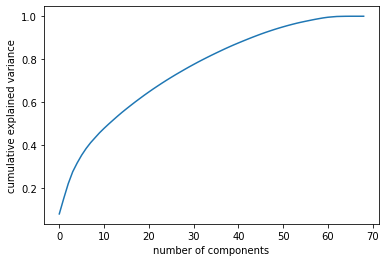

time: 202 ms (started: 2021-04-18 15:39:36 +08:00)


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [83]:
pf2 = evaluate_models(models, X_trainNew)
display(pf2)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854117,0.716834,0.800388,0.716834,0.744632,0.677508,0.856178,0.493837,0.118999,0.007479
1,Decision Tree Classifier,0.766201,0.651211,0.647830,0.651211,0.649089,0.313830,0.651211,0.298520,1.179182,0.006309
2,K-Nearest Neighbors,0.795570,0.612549,0.674816,0.612549,0.627623,0.359656,0.687384,0.265685,0.011568,0.696651
3,MLP Classifier,0.836496,0.730010,0.753024,0.730010,0.740025,0.625274,0.822928,0.480631,9.635657,0.008440
4,Gaussian Naive Bayes,0.819066,0.676119,0.724940,0.676119,0.693455,0.518883,0.795501,0.390268,0.026141,0.009627
5,Bernoulli Naive Bayes,0.823205,0.622375,0.761138,0.622375,0.645533,0.550620,0.786640,0.312600,0.022242,0.011220
6,Multinomial Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004615,0.000000
7,SVC,0.857005,0.703702,0.821177,0.703702,0.737946,0.684492,0.853081,0.483557,45.420653,0.774181
8,SGD Classifier,0.854599,0.720464,0.799715,0.720464,0.747312,0.675089,0.854417,0.498782,0.124864,0.007342
9,Random Forest Classifier,0.845643,0.658244,0.830989,0.658244,0.692410,0.654265,0.838962,0.402656,7.903122,0.051094


time: 1min 50s (started: 2021-04-18 15:39:36 +08:00)


## Shortlisting Best Models

To shortlist the best models, we compare the performance of the models based on balanced accuracy, PR-AUC, Cohen's Kappa score and Fit Time.

- Balanced Accuracy, PR-AUC, Cohen's Kappa scores are used because they are more appropriate to evaluate the performance of models on an imbalanced dataset.

- Balanced Accuracy shows the average of recall obtained on each class.

- PR-AUC (or average precision score) summarises the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

- Cohen's Kappa score expresses the level of agreement between two annotators on a classification problem.

- Fit Time is the time taken to train the models.

In [84]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

time: 636 µs (started: 2021-04-18 15:41:27 +08:00)


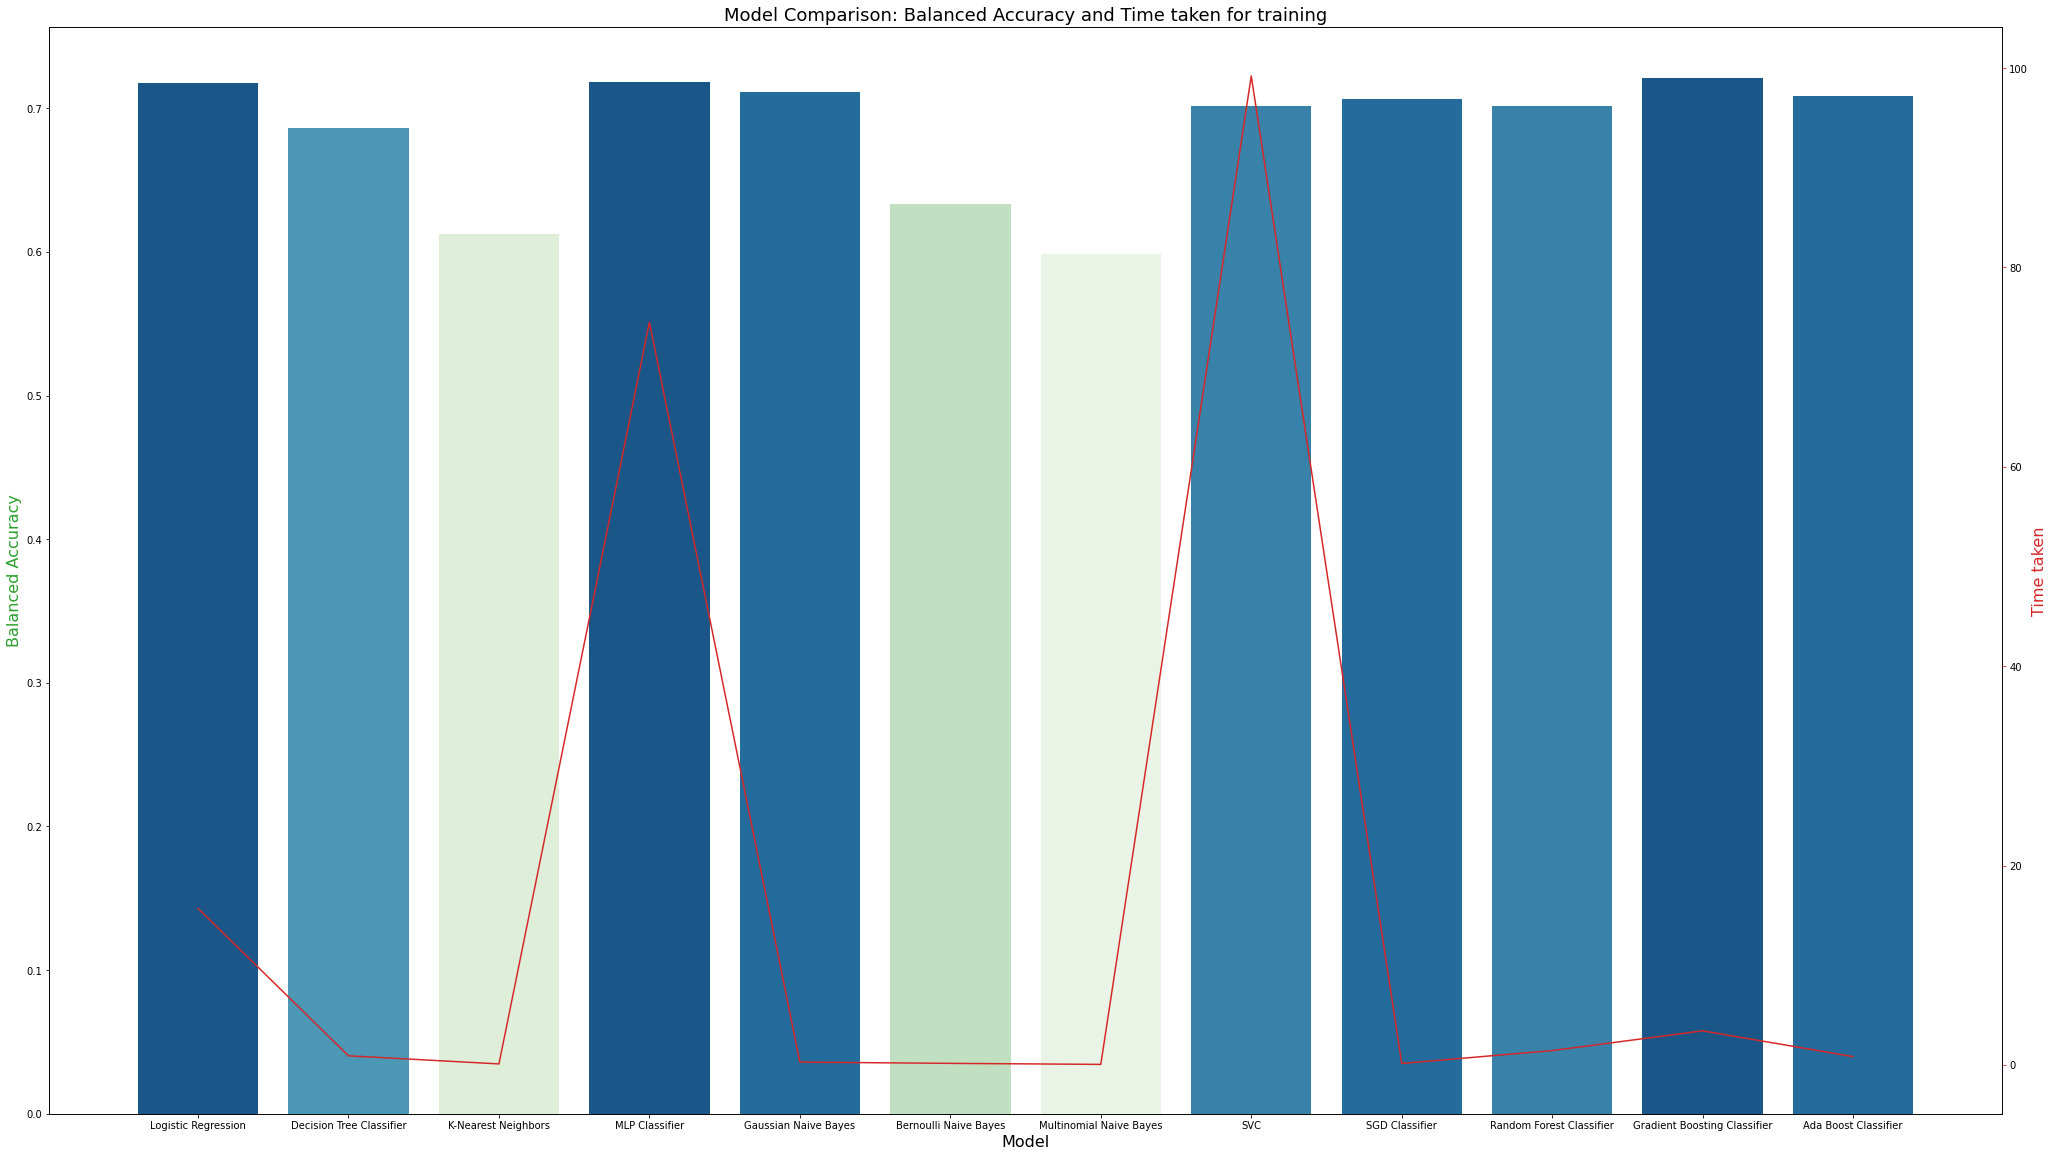

time: 365 ms (started: 2021-04-18 15:57:43 +08:00)


In [110]:
balanced_accuracy_scores = pf1['Balanced Accuracy']
pr_auc_scores = pf1['PR-AUC']
coh_kap_scores = pf1['Cohen Kappa']
tt = pf1['Fit Time']

model_data = {'Model': ['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbors',
                        'MLP Classifier','Gaussian Naive Bayes','Bernoulli Naive Bayes',
                        'Multinomial Naive Bayes', 'SVC', 'SGD Classifier',
                        'Random Forest Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'PR_AUC': pr_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(35,20))
ax1.set_title('Model Comparison: Balanced Accuracy and Time taken for training', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time taken', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

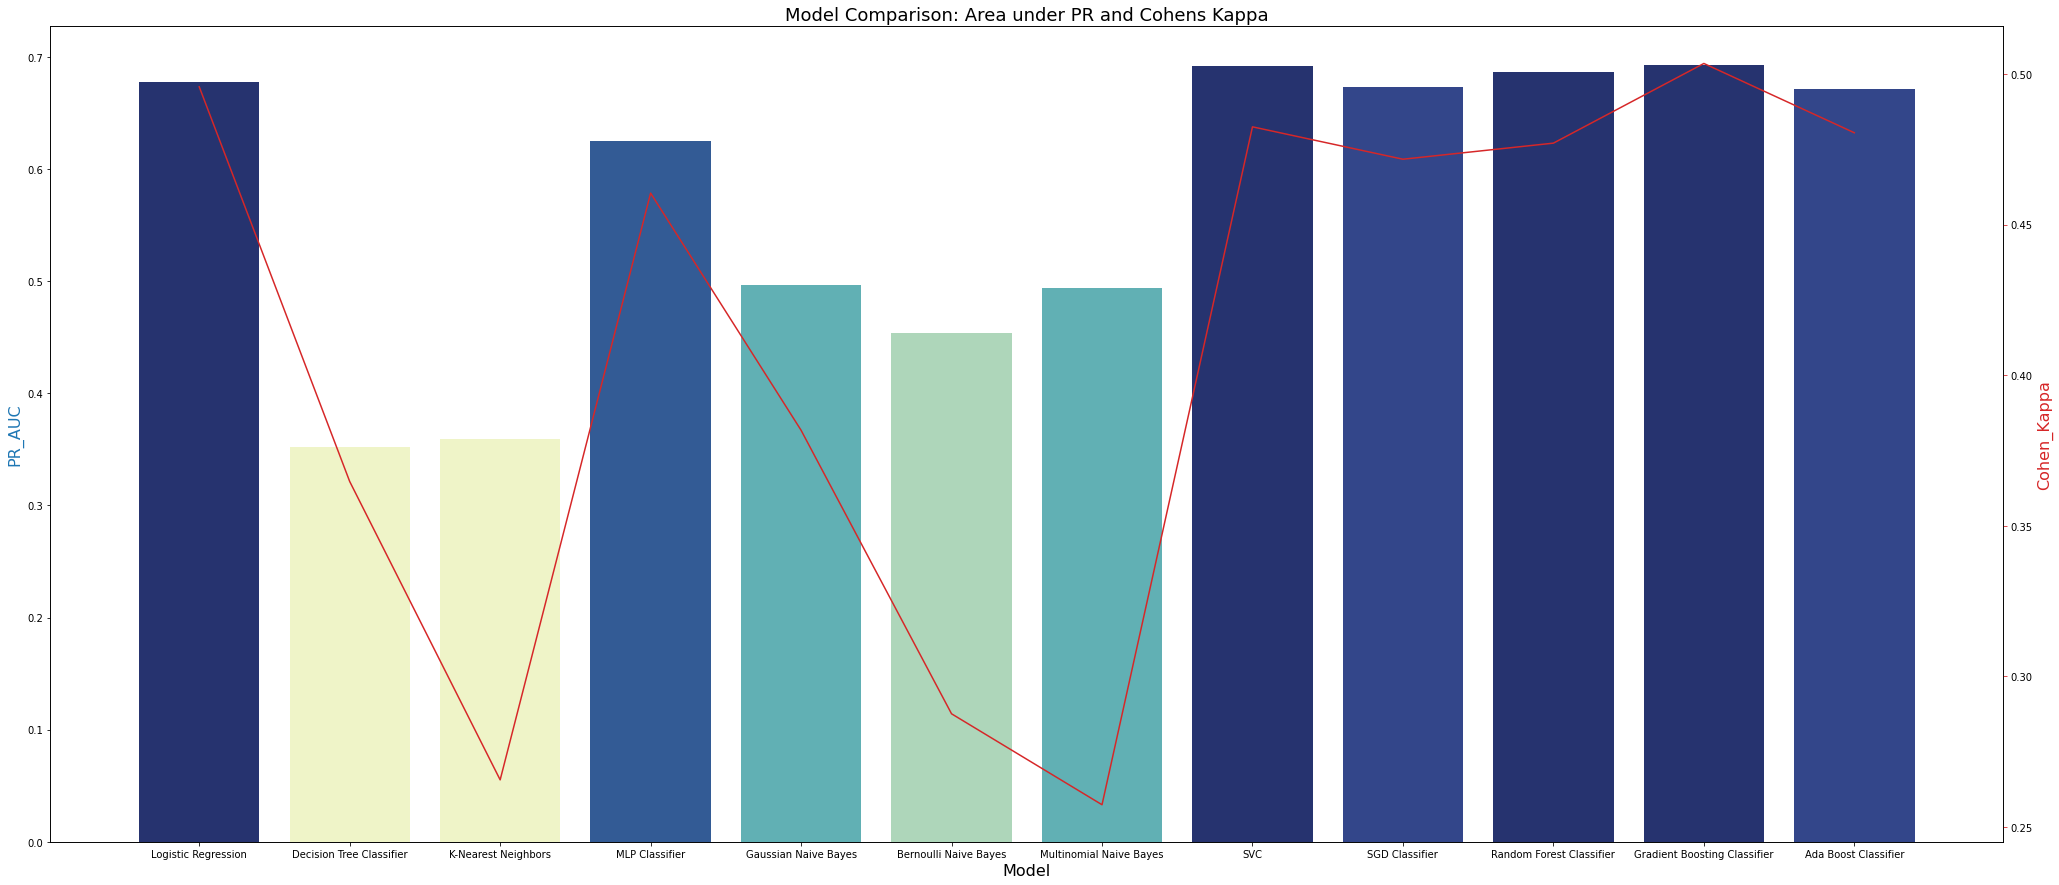

time: 406 ms (started: 2021-04-18 15:57:46 +08:00)


In [111]:
fig, ax3 = plt.subplots(figsize=(35,15))
ax3.set_title('Model Comparison: Area under PR and Cohens Kappa', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

## Hyperparameter Tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

def random_search(models, params, X_train):

  scoring = {'balanced_accuracy': 'balanced_accuracy',
            'average_precision': 'average_precision',
            'cohen_kappa': make_scorer(cohen_kappa_score)}

  best_estimator_list = []
  best_parameters_list = []
    
  for (name, model), param in zip(models, params):
    clf = RandomizedSearchCV(estimator=model, param_distributions=param,
                             n_jobs=-1, refit='cohen_kappa', cv=10,
                             scoring=scoring, random_state=42)
    
    search = clf.fit(X_train, y_train)

    # save the model to disk
    filename = name
    outfile = open(filename, 'wb')
    pickle.dump(clf, outfile)
    outfile.close()

    best_estimator_list.append((name, search.best_estimator_))
    best_parameters_list.append(search.best_params_)

  return best_estimator_list, best_parameters_list

time: 620 µs (started: 2021-04-18 15:41:28 +08:00)


In [88]:
models =[]
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Support Vector Classifier", SVC()))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))

params = []
lr_param_grid = {'penalty':['l1', 'l2'],
                 'C':[0.1, 1, 10, 100],
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }
svc_param_grid = {'gamma':[0.5, 1, 2, 10],
                  'C':[0.1, 1, 10, 100],
                  'kernel':['linear', 'rbf', 'poly', 'sigmoid']
                 }
gbc_param_grid = {'loss':['deviance', 'exponential'],
                  'learning_rate':[0.05, 0.1, 0.2],
                  'n_estimators':[50, 100, 150],
                  'criterion':['friedman_mse', 'mse'],
                  'min_samples_split':[0.1, 1, 10],
                  'min_samples_leaf':[0.1, 0.5, 1, 5],
                  'max_depth':[3, 5, 8],
                  'max_features':['log2', 'sqrt']
}
params.append(lr_param_grid)
params.append(svc_param_grid)
params.append(gbc_param_grid)

best_estimator_list, best_parameters_list = random_search(models, params, X_train)

time: 4min 1s (started: 2021-04-18 15:41:28 +08:00)


In [89]:
pd.set_option('display.max_colwidth', None) #remove python output 30 char max

paramdf = pd.DataFrame({
     'Model': [model[0] for model in models],
     'Best Parameters': best_parameters_list,
})

display(paramdf)

,Model,Best Parameters
0,Logistic Regression,"{'solver': 'liblinear', 'penalty': 'l1', 'C': 1}"
1,Support Vector Classifier,"{'kernel': 'linear', 'gamma': 10, 'C': 10}"
2,Gradient Boosting Classifier,"{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 8, 'loss': 'exponential', 'learning_rate': 0.2, 'criterion': 'friedman_mse'}"


time: 5.14 ms (started: 2021-04-18 15:45:29 +08:00)


In [90]:
# # load the model from disk
# loaded_model_list=[]
# for model in models:
#   filename = model[0]
#   loaded_model = pickle.load(open(filename, 'rb'))
#   loaded_model_list.append((model[0], loaded_model))
  
# pf3 = evaluate_models(loaded_model_list, X_train)

time: 204 ms (started: 2021-04-18 15:45:29 +08:00)


In [91]:
pf3 = evaluate_models(best_estimator_list, X_train)

time: 17.2 s (started: 2021-04-18 15:45:29 +08:00)


In [92]:
display(pf3)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854791,0.717551,0.801637,0.717551,0.745723,0.677712,0.856519,0.495950,1.573660,0.010310
1,Support Vector Classifier,0.854599,0.704358,0.811781,0.704358,0.736460,0.675102,0.851341,0.479932,11.875719,0.256398
2,Gradient Boosting Classifier,0.855656,0.723825,0.799625,0.723825,0.750471,0.693434,0.864667,0.504591,1.477332,0.016989


time: 7.52 ms (started: 2021-04-18 15:45:46 +08:00)


## Ensemble Models

In [93]:
from sklearn.ensemble import StackingClassifier 

def init_stacking():
    level0 = []
    level0.append(('Support Vector Classifier', SVC(kernel='linear', gamma=10, C=10)))
    level0.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=5, 
                                                                              max_features='sqrt', max_depth=8, loss='exponential', 
                                                                              learning_rate= 0.2, criterion='friedman_mse')))
    level1 = LogisticRegression(solver='liblinear', penalty='l1', C= 1)
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking2():
    level0 = []
    level0.append(('Support Vector Classifier', SVC(kernel='linear', gamma=10, C=10)))
    level0.append(('Logistic ', LogisticRegression(solver='liblinear', penalty='l1', C= 1)))
    
    level1 = GradientBoostingClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=5, 
                                                                              max_features='sqrt', max_depth=8, loss='exponential', 
                                                                              learning_rate= 0.2, criterion='friedman_mse')
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking3():
    level0 = []
    level0.append(('GBC', GradientBoostingClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=5, 
                                                                              max_features='sqrt', max_depth=8, loss='exponential', 
                                                                              learning_rate= 0.2, criterion='friedman_mse')))
    level0.append(('Logistic ', LogisticRegression(solver='liblinear', penalty='l1', C= 1)))

    level1 = SVC(kernel='linear', gamma=10, C=10)
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

time: 77.6 ms (started: 2021-04-18 15:45:46 +08:00)


In [94]:
models=[]
models.append(("Logistic Regression", LogisticRegression(penalty='l1', solver='liblinear', random_state=42)))
models.append(("SVC", SVC(kernel='rbf', random_state=42, probability=True)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)))
models.append(('StackedClassifier1', init_stacking()))
models.append(('StackedClassifier2', init_stacking2()))
models.append(('StackedClassifier3', init_stacking3()))

pf5 = evaluate_models(models, X_train)
display(pf5)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.854695,0.717491,0.801395,0.717491,0.745608,0.677692,0.856513,0.495712,1.821607,0.009636
1,SVC,0.857872,0.701601,0.826808,0.701601,0.737031,0.691840,0.857510,0.482430,44.514641,0.703556
2,Gradient Boosting Classifier,0.857007,0.720781,0.805794,0.720781,0.749524,0.692557,0.865345,0.503463,3.437889,0.012929
3,StackedClassifier1,0.859028,0.720822,0.813329,0.720822,0.751157,0.690893,0.858289,0.507226,53.697808,0.270209
4,StackedClassifier2,0.846991,0.702330,0.787543,0.702330,0.729789,0.643097,0.833593,0.464916,60.327352,0.249652
5,StackedClassifier3,0.858836,0.727993,0.806997,0.727993,0.755611,0.693276,0.867930,0.514899,13.492572,0.110804


time: 3min 7s (started: 2021-04-18 15:45:46 +08:00)


## Model Evaluation

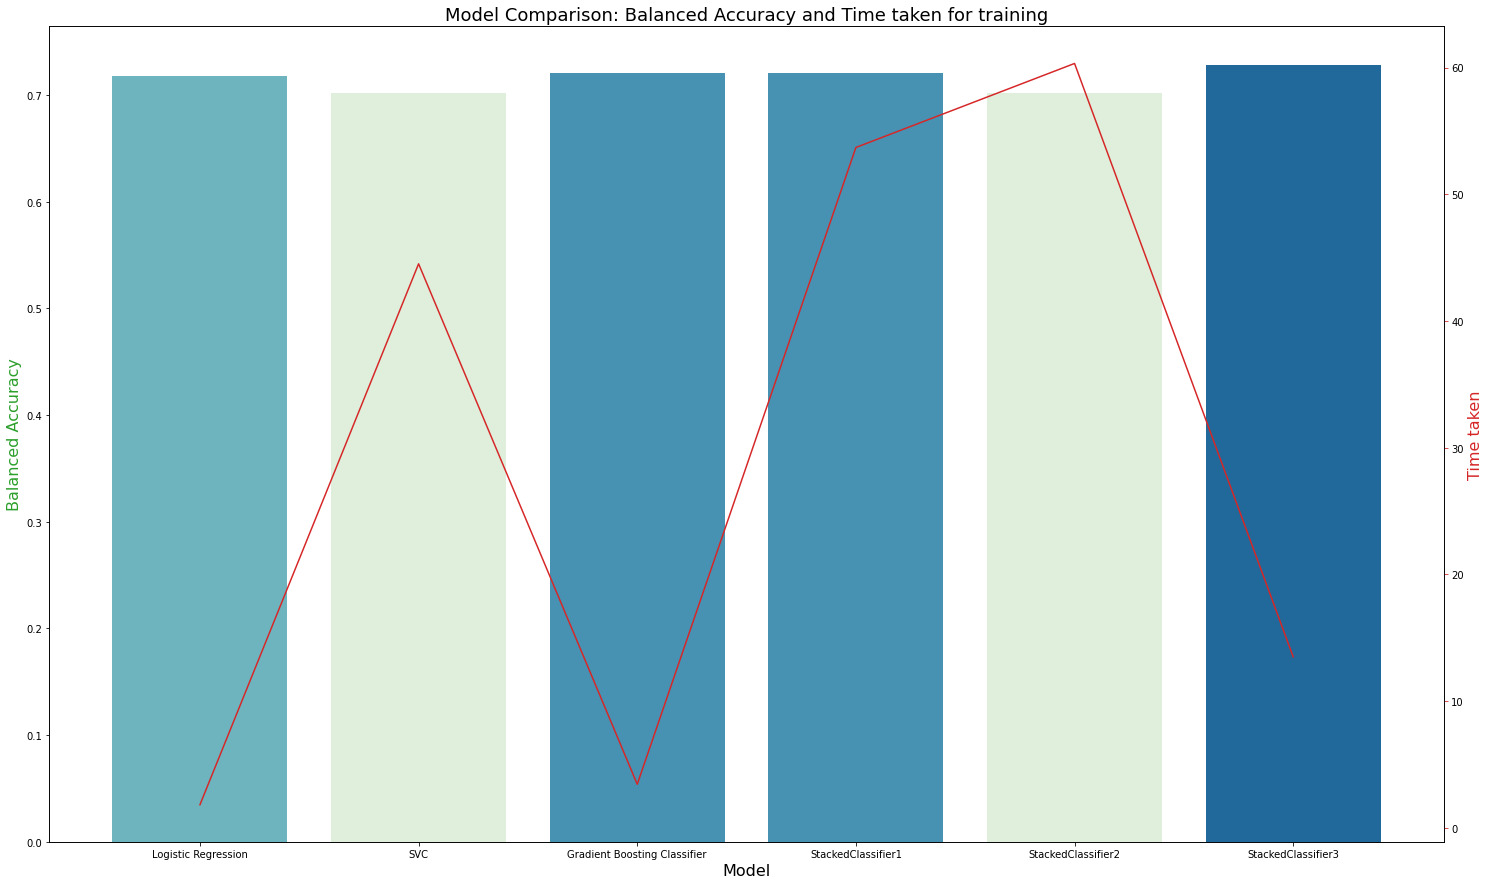

time: 265 ms (started: 2021-04-18 16:01:28 +08:00)


In [114]:
balanced_accuracy_scores = pf5['Balanced Accuracy']
pr_auc_scores = pf5['PR-AUC']
coh_kap_scores = pf5['Cohen Kappa']
tt = pf5['Fit Time']

model_data = {'Model': ['Logistic Regression', 'SVC', 'Gradient Boosting Classifier', 'StackedClassifier1', 'StackedClassifier2', 'StackedClassifier3'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'PR_AUC': pr_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(25,15))
ax1.set_title('Model Comparison: Balanced Accuracy and Time taken for training', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time taken', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

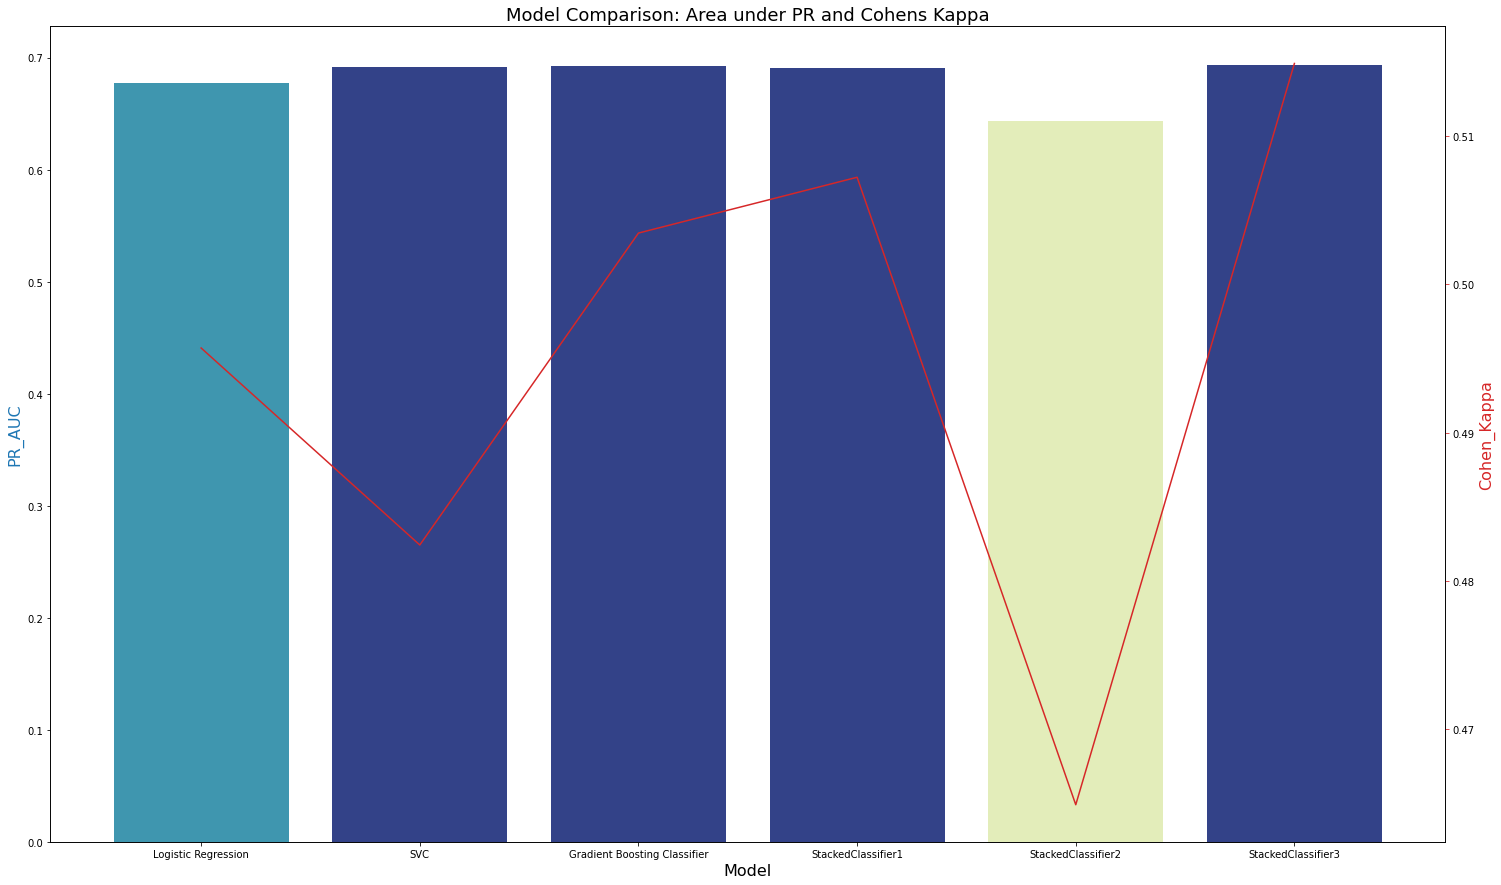

time: 237 ms (started: 2021-04-18 16:01:07 +08:00)


In [113]:
fig, ax3 = plt.subplots(figsize=(25,15))
ax3.set_title('Model Comparison: Area under PR and Cohens Kappa', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

Learning curve is used to compare the performance of the models on training and testing data over a varying number of training instances.

In [95]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_comb = pd.concat([X_train, X_test], axis=0)
y_comb = pd.concat([y_train, y_test], axis=0)

time: 5.55 ms (started: 2021-04-18 15:48:54 +08:00)


In [96]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(name, model):

    train_sizes = [1, 1000, 1500, 3000, 6000, 9000]
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_comb, y_comb, train_sizes = train_sizes, 
        cv = 10, n_jobs=-1, scoring = 'balanced_accuracy')
        
    train_scores_mean = train_scores.mean(axis = 1)   
    validation_scores_mean = validation_scores.mean(axis = 1)
        
    plt.plot(train_sizes, train_scores_mean, label='Training')
    plt.plot(train_sizes, validation_scores_mean, label='Validation')
        
    plt.ylabel('Balanced Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curve for '+ name
    plt.title(title, fontsize=14, y=1.05)
    plt.legend()
    plt.ylim(0,1.0)

time: 51.1 ms (started: 2021-04-18 15:48:54 +08:00)


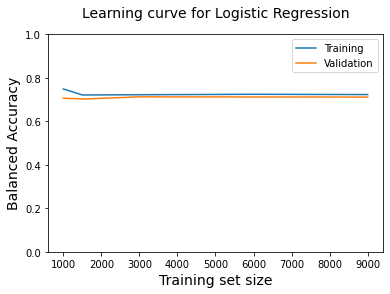

time: 3.39 s (started: 2021-04-18 15:48:54 +08:00)


In [97]:
plot_learning_curve('Logistic Regression', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))

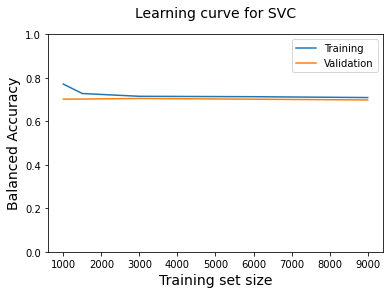

time: 21 s (started: 2021-04-18 15:48:57 +08:00)


In [98]:
plot_learning_curve('SVC', SVC(kernel='linear', gamma=10, C=10))

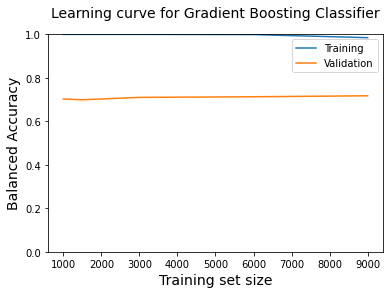

time: 4.24 s (started: 2021-04-18 15:49:18 +08:00)


In [99]:
plot_learning_curve('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=5, 
                                                                              max_features='sqrt', max_depth=8, loss='exponential', 
                                                                              learning_rate= 0.2, criterion='friedman_mse'))

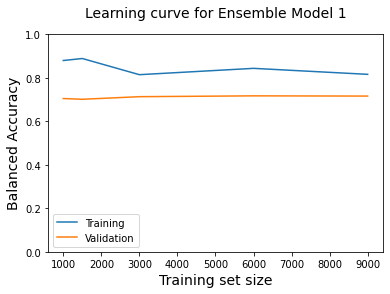

time: 1min 23s (started: 2021-04-18 15:49:22 +08:00)


In [100]:
plot_learning_curve('Ensemble Model 1', init_stacking())

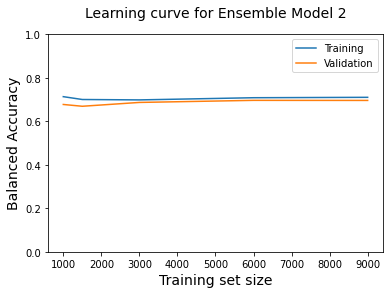

time: 1min 27s (started: 2021-04-18 15:50:46 +08:00)


In [101]:
plot_learning_curve('Ensemble Model 2', init_stacking2())

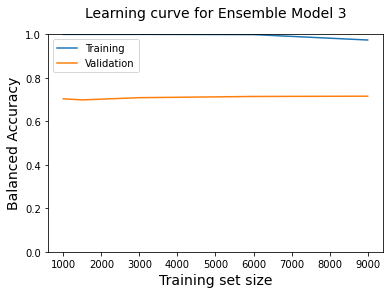

time: 29.2 s (started: 2021-04-18 15:52:14 +08:00)


In [102]:
plot_learning_curve('Ensemble Model 3', init_stacking3())

From the Learning Curves, we can conclude that:

- Logistic Regression, SVC and Ensemble Model 2 have minimal overfitting because the validation balanced accuracy scores are only slightly lower than the training balanced accuracy scores.

- Gradient Boosting Classifier, Ensemble Model 1 and Ensemble Model 3 are obviously overfitting because the validation balanced accuracy scores are a lot lower than the training balanced accuracy scores.

# Conclusion and Results

- By considering the balanced accuracy, Precision-Recall AUC, Cohen's Kappa and Training Time, the best model is Logistic Regression.

- The model has a balanced accuracy of **0.7175, Precision-Recall AUC of 0.6777, Cohen's Kappa score of 0.496 and Training Time of 1.8216s**.

- The model is able to generalise well on the testing data and can predict rain in Australia with an **accuracy of 0.8547**.

- Increasing the size of the training set did not improve the balanced accuracy of the model.

- Feature selection using PCA did not improve the performance of the model.

- Hyperparameter tuning was able to improve the performance of the model.

<b>Future Improvements</b>

We can further improve the performance of the models by 
- doing non-linear transformation before the model building.
- trying other feature selection methods such as SelectPercentile.
- comparing performance of models with and without feature scaling and removing outliers.

# References

Atanu Dan, 2018, Exploratory Data Analysis (EDA) in Python, viewed April 03 2021,
<https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python-893f963cc0c0>.

Economics and Statistics Administration, US Department of Commerce, 2014, Fostering innovation creating jobs driving better decisions value government-data, viewed April 02 2021, <https://web.archive.org/web/20180829083453/http://www.esa.doc.gov/reports/fostering-innovation-creating-jobs-driving-better-decisions-value-government-data>. 

Jake VanderPlas, 2021, In Depth: Principle Component Analysis,  viewed April 03 2021, <https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html>.

Kaggle, 2017, Feature Extraction with Different Methods, viewed April 03 2021, <https://www.kaggle.com/ferneutron/feature-extraction-with-different-methods>. 

Kaggle, 2020, Rainfall Prediction using 7 Popular Models, viewed April 03 2021,
<https://www.kaggle.com/chandrimad31/rainfall-prediction-using-7-popular-models>. 

Kaggle, 2020, Will It Rain Tomorrow? (EDA+FE+Modelling), viewed April 10 2021,
<https://www.kaggle.com/hkubra/will-it-rain-tomorrow-eda-fe-modelling>.

Kaggle, 2020, Extensive Analysis - EDA + FE + Modelling, viewed April 10 2021,
<https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling>. 

National Geographic, 2021, Weather, viewed April 03 2021, <https://www.nationalgeographic.org/encyclopedia/weather/ >.

Nikita Sharma, 2018, Exploratory Data Analysis (EDA) Tecgbuqyes For Kaggle Competition Beginners, viewed April 03 2021, <https://confusedcoders.com/data-science/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners>.

Scikit-learn, 2021, Cohen’s Kappa Score, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html>. 

Scikit-learn, 2021, Average Precision Score, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html>.

Scikit-learn, 2021, Balanced Accuracy Score, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html>.

Scikit-learn, 2021, Cross Validate, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html>.

Scikit-learn, 2021, Randomized Search Cross Validation, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html>.

Scikit-learn, 2021, Gradient Boosting Classifier, viewed April 10 2021,
<https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html>.

Zhe Chyuan Yeap,  2020, Exploratory Data Analysis on Stroke Data Set, viewed April 03 2021, <https://towardsdatascience.com/step-by-step-exploratory-data-analysis-on-stroke-dataset-840aefea8739>. 